In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import select_features
from pycaret.classification import *
from tsfresh import extract_features
from tsfresh import extract_relevant_features
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from notebooks_preprocessing_and_dataframe_creation import preprocessing_functions

In [2]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [3]:
metric = 'AUC' # F1 or AUC

In [4]:
df = pd.read_pickle('../data/unified_dataframe/data_unprocessed.pkl')
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,heart_rate_alert,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,None,2351.59,62.79210,6517.5,[Walk],71.701565,149.0,24.0,33.0,713.0,False,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,None,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,NaN,NaN
1,621e328667b776a240281372,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2619.85,41.38447,6568.9,[Walk],83.919698,132.0,7.0,30.0,1271.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550.0,278.0,766.0,29.0,1.0,>=30,MALE,>=30,None,NaN,NaN,Maintenance,intrinsic_regulation,NaN,HIGH,AVERAGE,HIGH,LOW,LOW,NaN,NaN
2,621e326767b776a24012e179,2021-05-24,NaN,46.120,53.968,95.3,14.4,80.0,0.666667,0.925,0.766667,-4.129593,None,2204.50,52.76058,11283.7,[Walk],68.275766,278.0,41.0,67.0,616.0,False,NaN,52.516339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16992.0,131.0,1225.0,0.0,0.0,<30,FEMALE,<19,None,NaN,NaN,Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,3792.13,53.53183,16776.8,[Walk],78.842893,190.0,79.0,108.0,1063.0,False,NaN,60.977217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21284.0,175.0,1130.0,9.0,0.0,<30,MALE,21.0,None,NaN,NaN,Maintenance,identified_regulation,NaN,LOW,LOW,LOW,AVERAGE,HIGH,NaN,NaN
4,621e333567b776a240a0c217,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[LIFETIME_DISTANCE],NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,MALE,21.0,None,NaN,NaN,Contemplation,intrinsic_regulation,NaN,AVERAGE,HIGH,AVERAGE,LOW,LOW,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e30b267b776a240c5e13f,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1554.15,42.17696,209.4,None,89.131283,33.0,0.0,0.0,1407.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,19.0,126.0,0.0,0.0,<30,FEMALE,21.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7800,621e312a67b776a240164d59,2022-01-17,34.237581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.165995,[DAILY_FLOORS],1602.67,47.22494,3806.9,None,67.473381,125.0,27.0,5.0,116.0,False,NaN,58.157746,25800000.0,0.0,379.0,51.0,1.0,94.0,0.835443,0.728571,0.796667,0.902439,4966.0,114.0,563.0,0.0,0.0,>=30,MALE,25.0,None,2022-01-17T00:45:00.000,2022-01-17T07:55:00.000,Contemplation,intrinsic_regulation,NaN,AVERAGE,LOW,HIGH,AVERAGE,LOW,NaN,NaN
7801,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.999818,[DAILY_FLOORS],2887.52,49.82090,9000.0,"[Sport, Walk]",74.452687,164.0,37.0,63.0,875.0,False,NaN,64.007904,18060000.0,0.0,276.0,25.0,0.0,99.0,0.708333,0.609756,0.714286,1.066667,12096.0,129.0

In [5]:
df_pre = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
df_pre

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,is_index,iv_index,sri_index,sjl_index,mode_startTime,mode_endTime,mode_startTime_sin,mode_startTime_cos,mode_endTime_sin,mode_endTime_cos,isp_index,steps_is_index,steps_iv_index,steps_sri_index,steps_isp_index,exercise_is_index,exercise_iv_index,exercise_sri_index,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,is_weekend,is_holiday,startDay_sin,startDay_cos,startWeek_sin,startWeek_cos,startWeekday_sin,startWeekday_cos,startMonth_sin,startMonth_cos,startYear_sin,startYear_cos,endDay_sin,endDay_cos,endWeek_sin,endWeek_cos,endWeekday_sin,endWeekday_cos,endMonth_sin,endMonth_cos,endYear_sin,endYear_cos,startHour_sin,startHour_cos,endHour_sin,endHour_cos,Steps_hour0,Steps_hour1,Steps_hour2,Steps_hour3,Steps_hour4,Steps_hour5,Steps_hour6,Steps_hour7,Steps_hour8,Steps_hour9,Steps_hour10,Steps_hour11,Steps_hour12,Steps_hour13,Steps_hour14,Steps_hour15,Steps_hour16,Steps_hour17,Steps_hour18,Steps_hour19,Steps_hour20,Steps_hour21,Steps_hour22,Steps_hour23
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,0.930443,0.343581,90.495130,1.091284,23.0,9.0,0.382683,-0.92388,-3.826834e-01,-0.92388,0.945035,0.287117,1.655374,89.963574,0.381108,0.224056,2.003963,77.127735,2,1,3.255517e+07,8892.885057,0.0,0.0,0.060330,0.998178,-0.281733,0.959493,0.000000,1.000000,0.012703,0.999919,-0.908669,0.417518,0.060330,0.998178,-0.0,1.0,0.000000,1.000000,0.012703,0.999919,-0.908669,0.417518,0.000000,1.000000,0.022699,0.999742,134.0,0.0,0.0,15.0,0.0,0.0,39.0,0.0,7.0,10.0,2626.0,992.0,429.0,29.0,191.0,33.0,342.0,1712.0,1838.0,160.0,155.0,37.0,31.0,53.0
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0

# Predict personality aggreableness

In [6]:
aggreableness = df.drop(columns=['date','startTime', 'endTime', 'label_sema_negative_feelings', 'label_ipip_extraversion_category', 'label_ipip_conscientiousness_category','label_ipip_stability_category', 'label_ipip_intellect_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])

In [7]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(aggreableness)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [8]:
s = setup(data=train_data, target='label_ipip_agreeableness_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,label_ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(5199, 43)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2863,0.5274,0.2919,0.1498,0.1893,-0.0464,-0.0580,2.4433
dummy,Dummy Classifier,0.2810,0.5000,0.3333,0.0808,0.1251,0.0000,0.0000,0.0567
nb,Naive Bayes,0.3079,0.4984,0.2997,0.3246,0.2837,-0.0397,-0.0438,1.0667
knn,K Neighbors Classifier,0.3135,0.4950,0.3232,0.3302,0.3136,-0.0189,-0.0200,1.3167
dt,Decision Tree Classifier,0.3037,0.4819,0.3033,0.3213,0.3071,-0.0381,-0.0393,0.0833
ada,Ada Boost Classifier,0.2927,0.4117,0.2616,0.2636,0.2688,-0.0873,-0.0933,0.2733
qda,Quadratic Discriminant Analysis,0.2209,0.4020,0.2109,0.1699,0.1872,-0.1853,-0.2032,0.0900
lightgbm,Light Gradient Boosting Machine,0.2826,0.3964,0.2555,0.2672,0.2680,-0.0974,-0.1056,0.8500
gbc,Gradient Boosting Classifier,0.2841,0.3958,0.2677,0.2591,0.2649,-0.0915,-0.0985,2.6867
rf,Random Forest Classifier,0.2505,0.3781,0.2408,0.2204,0.2270,-0.1273,-0.1350,0.3600


In [10]:
lr = create_model('lr', fold=3)
tuned_lr = tune_model(lr)
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)
d.reset_index(inplace=True)
d=d.head(15)
d = d.drop(columns='index')
d['Label'] = 'agreeableness'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/agreeableness2.pkl')
d

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2698,0.4606,0.2727,0.2973,0.2748,-0.0854,-0.0880
1,0.3566,0.5453,0.3234,0.2716,0.2721,-0.0066,-0.0080
2,0.4684,0.6117,0.4516,0.3485,0.3864,0.1839,0.2144
Mean,0.3649,0.5392,0.3492,0.3058,0.3111,0.0306,0.0395
Std,0.0813,0.0618,0.0753,0.0320,0.0532,0.1130,0.1279


,Label,Feature,Value
0,agreeableness,sleep_duration,1.457983e-09
1,agreeableness,steps,5.464684e-12
2,agreeableness,distance,3.916464e-12
3,agreeableness,calories,1.357298e-12
4,agreeableness,lightly_active_minutes,1.536887e-13
5,agreeableness,sedentary_minutes,1.272217e-13
6,agreeableness,minutes_in_default_zone_1,3.778924e-14
7,agreeableness,rmssd,3.735521e-14
8,agreeableness,minutes_below_default_zone_1,3.529660e-14
9,agreeableness,moderately_active_minutes,2.207850e-14


In [11]:
aggreableness = df_pre.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_extraversion_category', 'label_ipip_conscientiousness_category','label_ipip_stability_category', 'label_ipip_intellect_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])

In [12]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(aggreableness)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [13]:
s = setup(data=train_data, target='label_ipip_agreeableness_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(5199, 148)"
5,Missing Values,True
6,Numeric Features,107
7,Categorical Features,40
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3790,0.5532,0.3661,0.3361,0.3420,0.0775,0.0995,0.8533
ada,Ada Boost Classifier,0.3534,0.5404,0.3777,0.5555,0.3429,0.0726,0.0974,0.8400
gbc,Gradient Boosting Classifier,0.4042,0.5130,0.3894,0.4040,0.3634,0.1118,0.1240,5.6967
dt,Decision Tree Classifier,0.3235,0.5005,0.3146,0.3922,0.3015,-0.0045,-0.0025,0.5867
dummy,Dummy Classifier,0.3126,0.5000,0.3333,0.1039,0.1544,0.0000,0.0000,0.2200
lr,Logistic Regression,0.2782,0.4787,0.2703,0.3439,0.2910,-0.0737,-0.0770,0.3600
rf,Random Forest Classifier,0.3077,0.4759,0.3011,0.3457,0.3132,-0.0294,-0.0286,0.5833
qda,Quadratic Discriminant Analysis,0.2861,0.4603,0.2750,0.2977,0.2650,-0.0775,-0.0832,0.3533
nb,Naive Bayes,0.2658,0.4201,0.2549,0.2689,0.2584,-0.1154,-0.1194,0.2300
et,Extra Trees Classifier,0.2428,0.4026,0.2449,0.3050,0.2401,-0.1304,-0.1274,0.4733


In [15]:
lr = create_model('lr', fold=3)
tuned_lr = tune_model(lr)
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)
d.reset_index(inplace=True)
d=d.head(15)
d = d.drop(columns='index')
d['Label'] = 'agreeableness'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/agreeableness1.pkl')
d

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1349,0.3325,0.1174,0.1513,0.1401,-0.2948,-0.3026
1,0.3382,0.4911,0.3413,0.5000,0.3573,0.0037,0.0040
2,0.4110,0.6434,0.3928,0.4855,0.4355,0.1260,0.1289
Mean,0.2947,0.4890,0.2838,0.3789,0.3110,-0.0550,-0.0566
Std,0.1168,0.1269,0.1195,0.1611,0.1250,0.1767,0.1813


,Label,Feature,Value
0,agreeableness,exercise_sri_index,7.218981
1,agreeableness,mode_endTime_15.0,5.746555
2,agreeableness,mode_endTime_9.0,5.675982
3,agreeableness,mode_endTime_6.0,5.400330
4,agreeableness,mode_startTime_cos,4.714518
5,agreeableness,steps_is_index,4.021009
6,agreeableness,sjl_index,3.813241
7,agreeableness,average_sleep_duration,3.724154
8,agreeableness,different_activity_types_4,3.300447
9,agreeableness,mode_endTime_19.0,3.015489


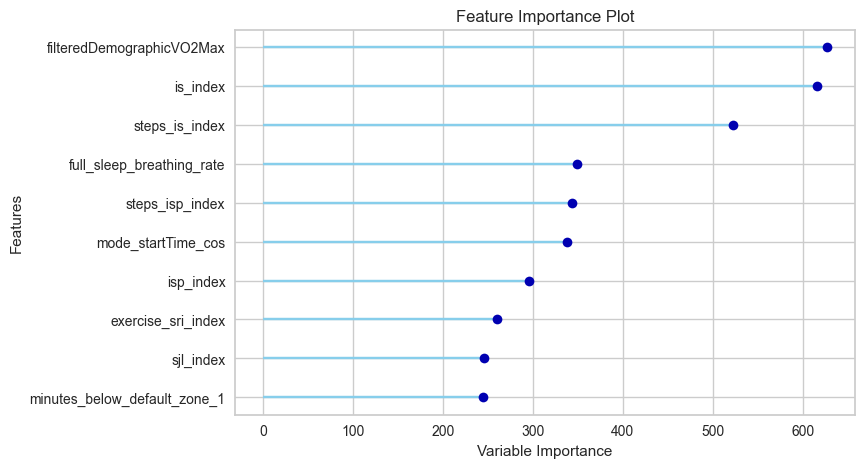

In [16]:
plot_model(best, plot='feature')

In [17]:
df = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
aggreableness = df.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_extraversion_category', 'label_ipip_conscientiousness_category','label_ipip_stability_category', 'label_ipip_intellect_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])
aggreableness = aggreableness[aggreableness['label_ipip_agreeableness_category'].notna()]
y = aggreableness['label_ipip_agreeableness_category']

In [18]:
cols = ['stress_score', 'steps', 'sleep_duration']
for col in cols:
    extracted_features = extract_features(df, column_id="id", column_sort="date",
                                          n_jobs=5, column_kind=None, column_value=col,
                                          show_warnings=False)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "id"})
    aggreableness = aggreableness.merge(extracted_features, how='left', on=['id'])

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.94it/s]


In [19]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(aggreableness)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [20]:
s = setup(data=train_data, target='label_ipip_agreeableness_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_ipip_agreeableness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(3985, 2515)"
5,Missing Values,True
6,Numeric Features,2240
7,Categorical Features,274
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.4634,0.6596,0.4790,0.6299,0.4800,0.2083,0.2403,1.6700
gbc,Gradient Boosting Classifier,0.4031,0.6567,0.4125,0.4334,0.4025,0.1059,0.1108,7.2333
lr,Logistic Regression,0.4036,0.6558,0.4432,0.5670,0.3950,0.1438,0.1900,2.9733
dt,Decision Tree Classifier,0.4732,0.6131,0.4626,0.5554,0.4987,0.2108,0.2209,1.0200
rf,Random Forest Classifier,0.4439,0.6113,0.4910,0.5324,0.4297,0.2182,0.2764,0.7567
et,Extra Trees Classifier,0.2949,0.6016,0.3280,0.3045,0.2691,0.0000,0.0242,0.6867
knn,K Neighbors Classifier,0.4165,0.5673,0.3962,0.4011,0.3924,0.1160,0.1239,3.3200
nb,Naive Bayes,0.2712,0.5611,0.3234,0.4207,0.2372,0.0038,-0.0073,1.0400
qda,Quadratic Discriminant Analysis,0.4486,0.5525,0.3916,0.2585,0.3192,0.1012,0.1246,0.8033
ada,Ada Boost Classifier,0.3578,0.5374,0.3082,0.3269,0.3206,-0.0002,0.0046,1.1167


In [22]:
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3747,0.6165,0.3578,0.3737,0.3731,0.0550,0.0552
1,0.4085,0.5944,0.5210,0.6343,0.4061,0.2083,0.2798
2,0.4275,0.7564,0.4508,0.6929,0.4058,0.1680,0.2351
Mean,0.4036,0.6558,0.4432,0.5670,0.3950,0.1438,0.1900
Std,0.0218,0.0717,0.0668,0.1388,0.0155,0.0649,0.0971


In [23]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3747,0.6179,0.3578,0.3798,0.3754,0.0570,0.0573
1,0.4085,0.5879,0.5126,0.6212,0.4102,0.2037,0.2670
2,0.4387,0.7528,0.4591,0.6944,0.4217,0.1823,0.2496
Mean,0.4073,0.6529,0.4432,0.5651,0.4025,0.1476,0.1913
Std,0.0261,0.0717,0.0642,0.1344,0.0197,0.0647,0.0950


In [24]:
print(tuned_lr)

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


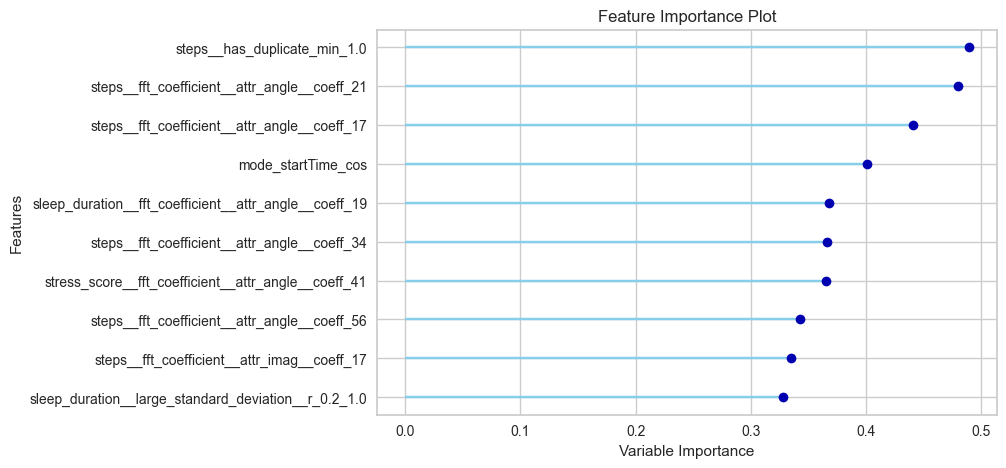

In [25]:
plot_model(tuned_lr, plot = 'feature')

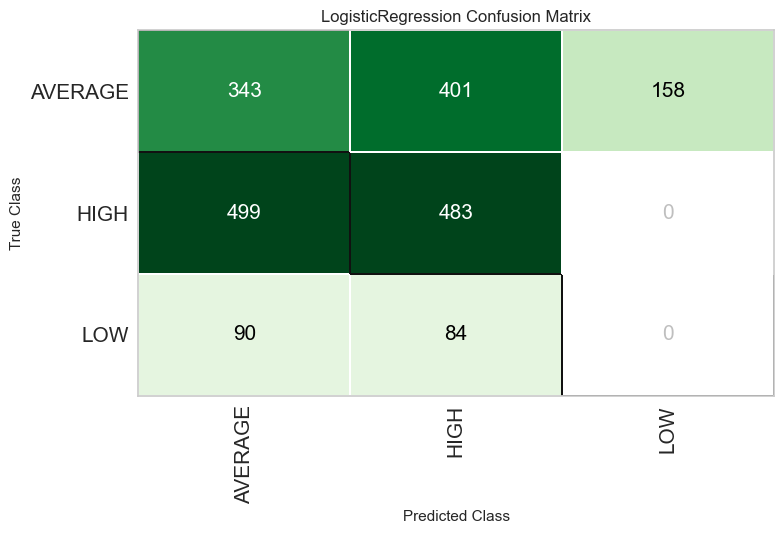

In [26]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [27]:
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)

In [28]:
d.reset_index(inplace=True)
d=d.head(20)
d = d.drop(columns='index')
d['Label'] = 'agreeableness'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/agreeableness.pkl')
d

,Label,Feature,Value
0,agreeableness,steps__has_duplicate_min_1.0,0.489091
1,agreeableness,steps__fft_coefficient__attr_angle__coeff_21,0.479461
2,agreeableness,steps__fft_coefficient__attr_angle__coeff_17,0.440428
3,agreeableness,mode_startTime_cos,0.400605
4,agreeableness,sleep_duration__fft_coefficient__attr_angle__c...,0.367433
5,agreeableness,steps__fft_coefficient__attr_angle__coeff_34,0.366116
6,agreeableness,stress_score__fft_coefficient__attr_angle__coe...,0.365660
7,agreeableness,steps__fft_coefficient__attr_angle__coeff_56,0.342528
8,agreeableness,steps__fft_coefficient__attr_imag__coeff_17,0.334728
9,agreeableness,sleep_duration__large_standard_deviation__r_0....,0.328178
